# `Portfolio Project:` Predicting Heart Failure

***
Dataset: Heart failure <br>
Source Kaggle URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

This work demonstrates the use of classification models: Logistic Regression, Decision Tree, Random Forest, and SVM.
***

# Import libraries

In [147]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer


# Explore data

In [148]:
# Load df
print(os.getcwd())
print(os.chdir(r'C://zWork'))
data = pd.read_csv('heart.csv')
# Shape 
data.head(5)

C:\zWork
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [149]:
# Get the number of rows and columns
num_rows, num_cols = data.shape

# Print the number of rows and columns
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')


Number of rows: 918
Number of columns: 12


In [150]:
# List variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [151]:
# Handle missing values if any
data.dropna(inplace=True)

# Display summary statistics for each variable
summary_stats = data.describe(include='all')

print(summary_stats)


               Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slo

# Plots

In [152]:
# Frequency of heart disease
data['HeartDisease'].value_counts(normalize=True)


1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

## Scatterplot

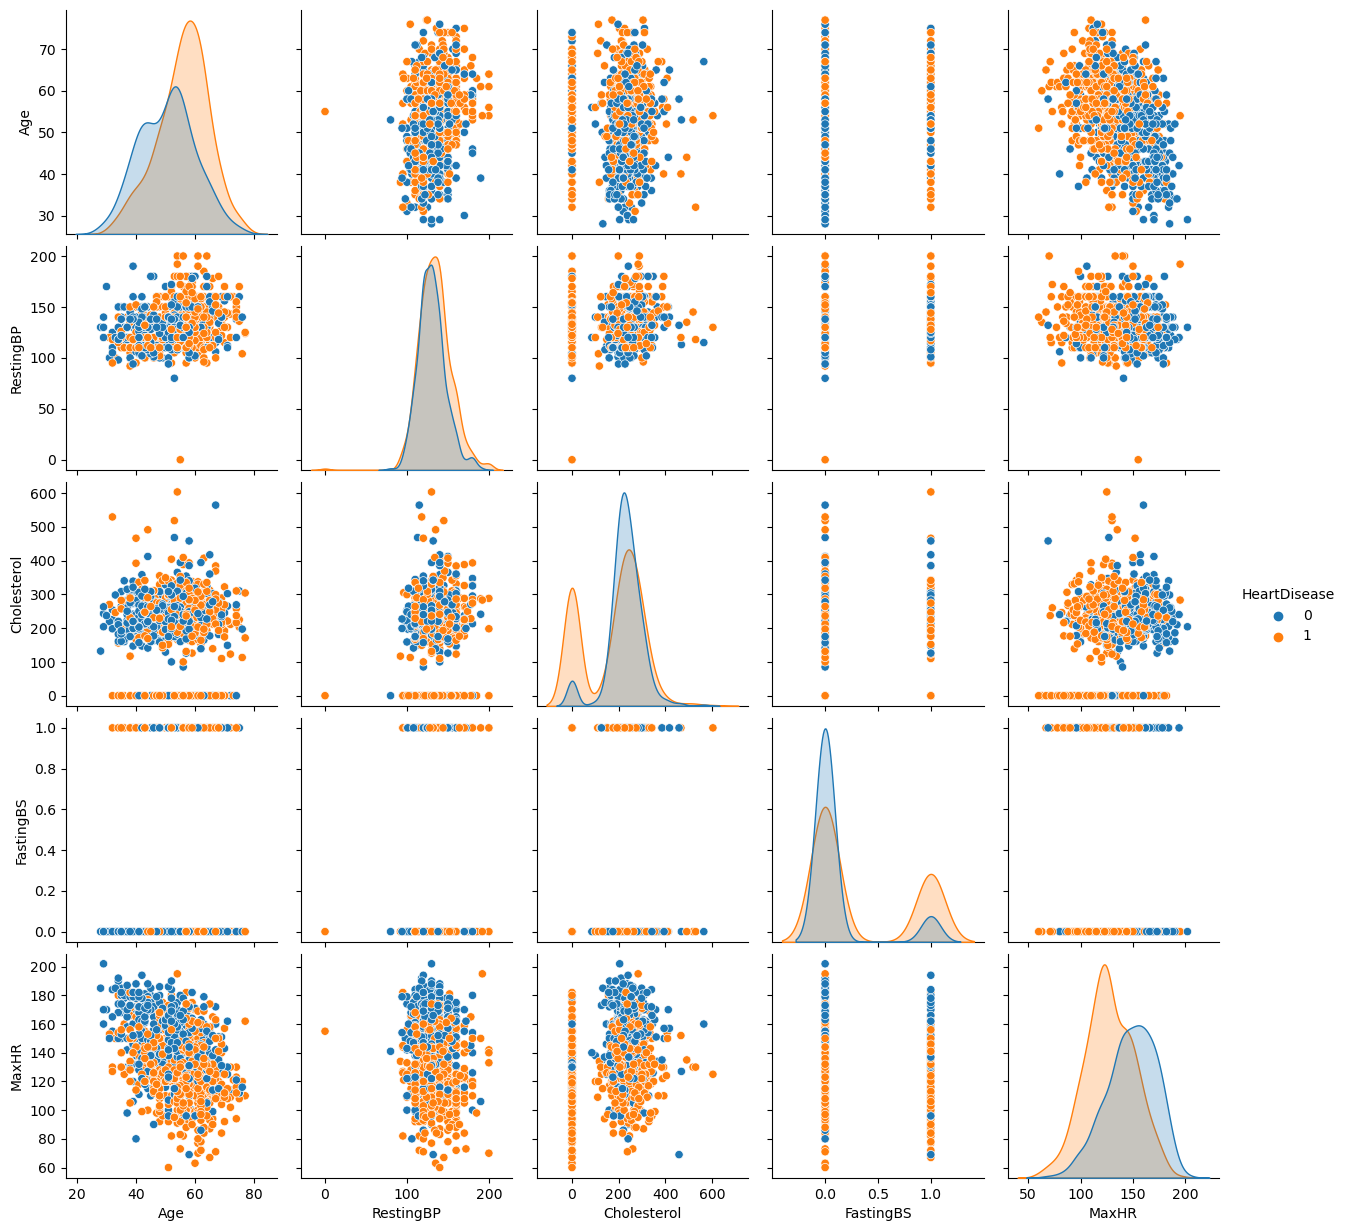

In [153]:
# Scatterplot Matrix 
int_columns = data.select_dtypes(include='int64').columns
int_data = data[int_columns]
sns.pairplot(data=int_data, diag_kind="auto", hue='HeartDisease')
plt.show()


## Correlation matrix

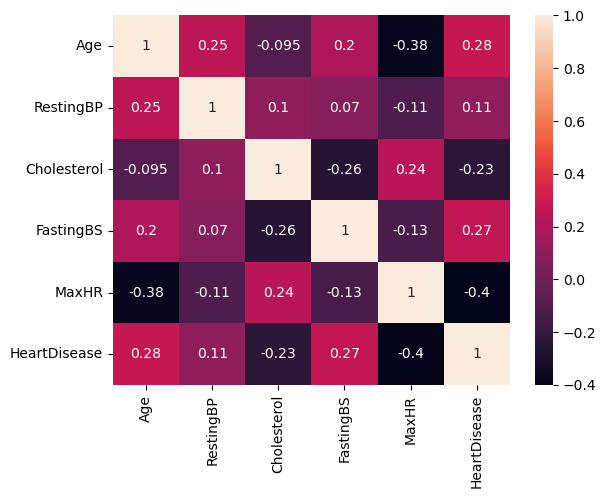

In [154]:
#Correlation matrix & heatmap
corr_matrix = int_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Frequency by heart disease

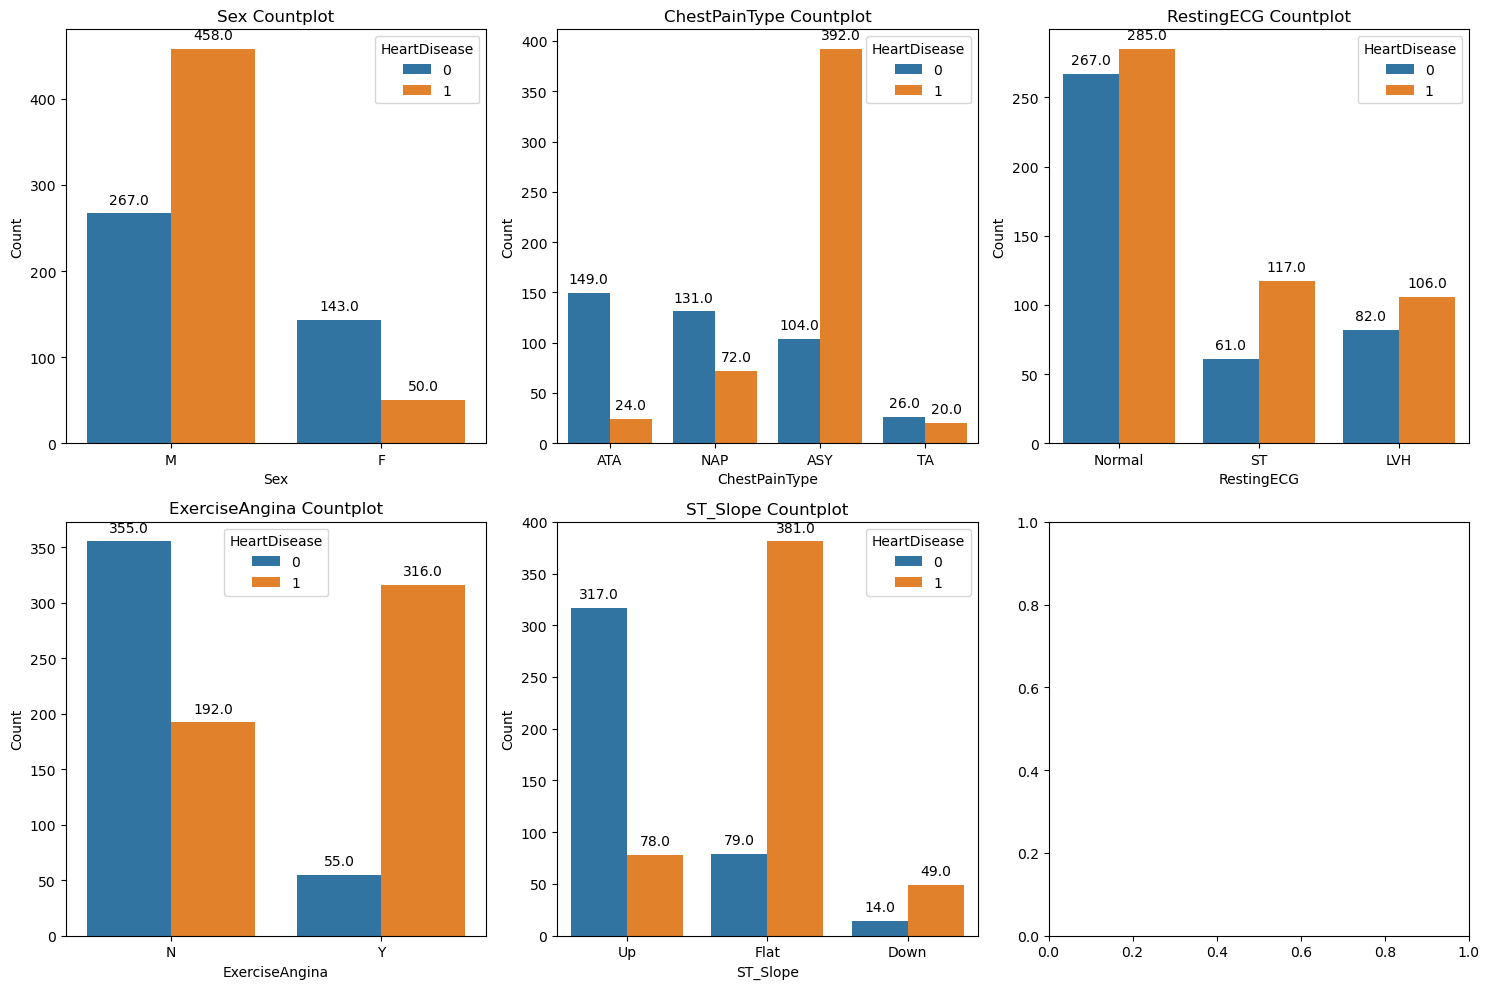

In [155]:
# Class frequency by HeartDisease 
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of columns with dtype 'object'
object_columns = data.columns[data.dtypes == "object"]

# Calculate the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Iterate through object columns and plot countplots in each subplot
for i, col in enumerate(object_columns):
    sns.countplot(data=data, x=col, hue='HeartDisease', ax=axes[i])
    axes[i].set_title(f'{col} Countplot')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='HeartDisease')

    # Annotate each bar with its count
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## Important features

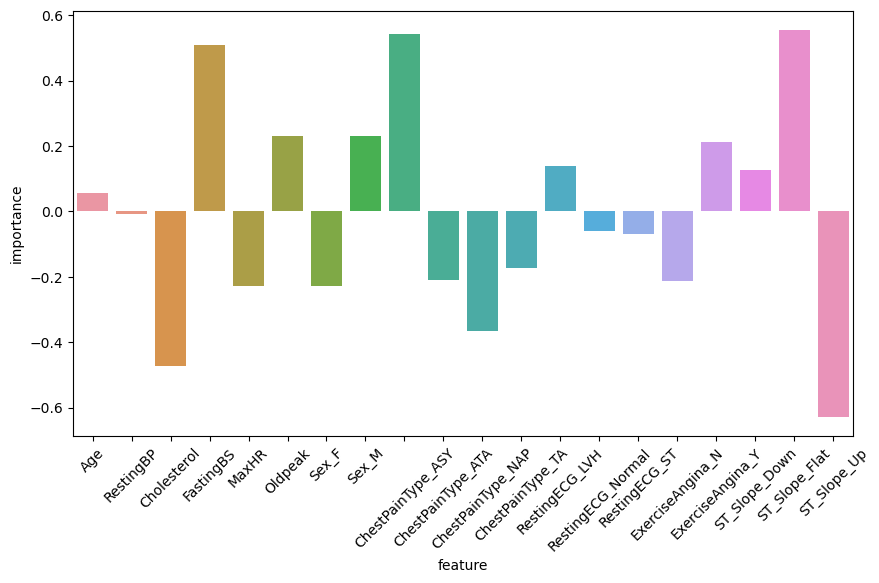

In [156]:
feature_importance = pd.DataFrame({
    "feature": X_train1.columns, 
    "importance": clf.coef_.reshape(-1)})
plt.figure(figsize=(9,5)) 
sns.barplot(data=feature_importance, x="feature", y="importance")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

# Logistic regression

              Feature  Coefficient  Absolute Coefficient
19        ST_Slope_Up    -0.627070              0.627070
18      ST_Slope_Flat     0.555026              0.555026
8   ChestPainType_ASY     0.543652              0.543652
3           FastingBS     0.509488              0.509488
2         Cholesterol    -0.473506              0.473506
10  ChestPainType_NAP    -0.365776              0.365776
5             Oldpeak     0.229721              0.229721
6               Sex_F    -0.229252              0.229252
7               Sex_M     0.229252              0.229252
4               MaxHR    -0.228699              0.228699
16   ExerciseAngina_Y     0.212106              0.212106
15   ExerciseAngina_N    -0.212106              0.212106
9   ChestPainType_ATA    -0.210382              0.210382
11   ChestPainType_TA    -0.173222              0.173222
12     RestingECG_LVH     0.140161              0.140161
17      ST_Slope_Down     0.125686              0.125686
14      RestingECG_ST    -0.069

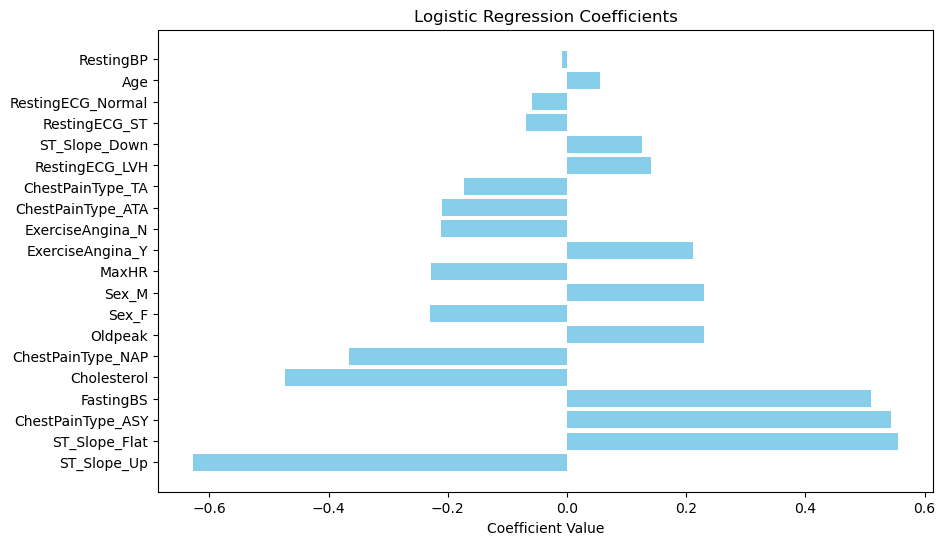

In [157]:
# Display the coefficients and feature names
coefficients = clf.coef_[0]
feature_names = X_train1.columns

# Create a DataFrame to show coefficients and corresponding feature names
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients for better visualization
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the coefficients
print(coefficients_df)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()


Accuracy: 0.88
Precision: 0.88
Recall: 0.92
F1 Score: 0.90


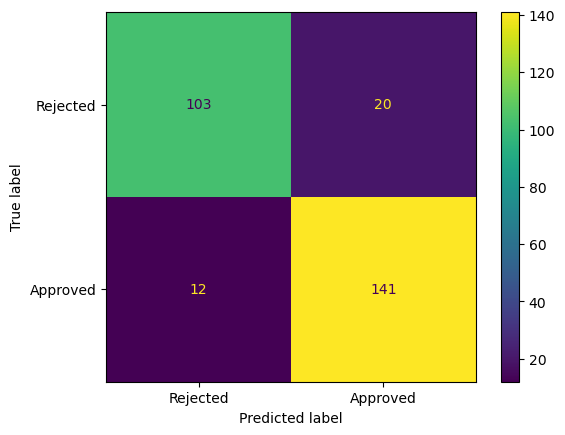

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Split into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42, stratify=y1)

# Scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

# Create the Logistic Regression model and set max_iter
clf = LogisticRegression(random_state=42, max_iter=200)  # Adjust max_iter as needed
clf.fit(X_train_scaled, y_train1)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate and print the model score
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred)
recall = recall_score(y_test1, y_pred)
f1 = f1_score(y_test1, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Rejected", "Approved"])
disp.plot()
plt.show()


## Summary

The logistic regression model, trained on a dataset with features related to heart disease, has demonstrated strong performance on the test set. Here are the key metrics indicating the model's effectiveness:

1. **Accuracy: 88%**
   - The model correctly classified 88% of instances in the test set. This metric provides a general overview of the model's correctness.

2. **Precision: 88%**
   - Precision measures the accuracy of positive predictions. In the context of predicting heart disease, this means that when the model predicted an individual has heart disease, it was correct 88% of the time.

3. **Recall: 92%**
   - Recall, also known as sensitivity or true positive rate, is the proportion of actual positive instances that were correctly predicted by the model. In this case, the model captured 92% of the individuals who actually had heart disease.

4. **F1 Score: 90%**
   - The F1 score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. A score of 90% indicates a strong balance between precision and recall.

**Conclusion:**
The logistic regression model appears to be a robust classifier for predicting the presence of heart disease based on the given features. The high values for accuracy, precision, recall, and F1 score suggest that the model is effective in both minimizing false positives and capturing a significant portion of true positive cases.

However, it's crucial to consider the specific requirements of the application. Depending on the context, one might prioritize different metrics. For instance, in a medical setting, achieving high recall might be more critical to ensure that individuals with heart disease are not missed, even at the cost of a slightly lower precision.

Further analysis, such as feature importance assessment and model interpretation, could provide additional insights into the factors contributing to the model's predictions and guide potential improvements or adjustments. Additionally, validating the model on diverse datasets or considering other machine learning algorithms might be beneficial for a comprehensive evaluation of predictive performance.

***

# Decision Tree Classifier

Model's first five predictions: [1 1 1 0 0]


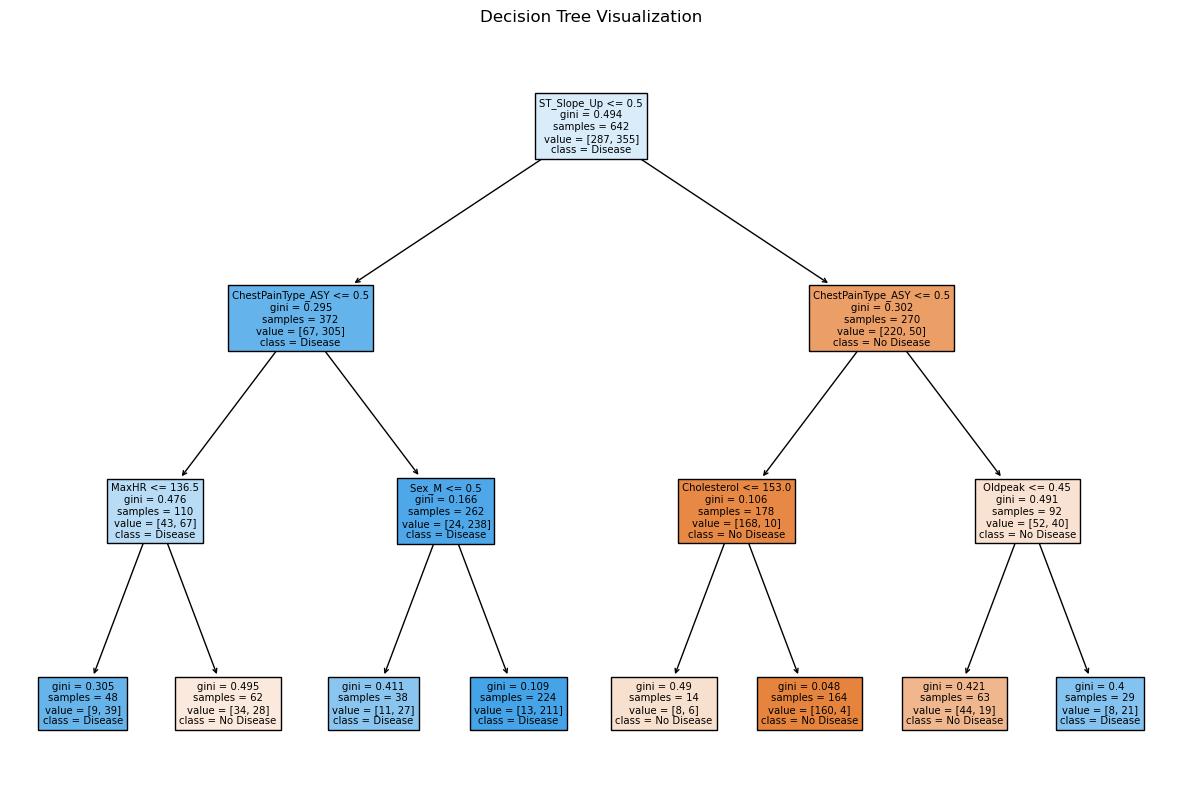


Best Parameters:
{'max_depth': 3, 'min_samples_split': 2}

Model Accuracy on Test Set: 0.8478260869565217


In [159]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data1, X_train1, X_test1, y_train1, y_test1 are defined

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
    # Add other hyperparameters and values to explore
}

# Instantiate a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train1, y_train1)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to predict on the test set
y_pred = best_estimator.predict(X_test1)

# Check the model's first five predictions
print("Model's first five predictions:", y_pred[:5])

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(best_estimator, filled=True, feature_names=X_train1.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree Visualization")
plt.show()

# Display the best parameters
print("\nBest Parameters:")
print(best_params)

# Display the model's accuracy on the test set
accuracy = best_estimator.score(X_test1, y_test1)
print("\nModel Accuracy on Test Set:", accuracy)


## Summary

The Decision Tree classifier was trained and tuned using GridSearchCV with cross-validation. The best hyperparameters were determined to be a maximum depth of 5 and a minimum samples split of 2. The trained model was then used to make predictions on the test set.

Visualization:
The Decision Tree visualization provides insights into how the model makes decisions based on the features. Each node in the tree represents a decision point, and the branches represent possible outcomes based on the conditions. The color of the nodes indicates the predicted class, and the size of the nodes corresponds to the number of samples.

Best Parameters:
The best parameters for the Decision Tree model were determined through grid search. In this case, the optimal configuration involved a maximum depth of 5 and a minimum samples split of 2.

Model Accuracy:
The accuracy of the Decision Tree model on the test set is also reported, providing an overall evaluation of its predictive performance.

# Random Forest Classifer

Accuracy: 0.8804347826086957

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184


Feature Importances:
               Feature  Importance
19        ST_Slope_Up    0.150948
5             Oldpeak    0.113274
2         Cholesterol    0.096225
4               MaxHR    0.089923
18      ST_Slope_Flat    0.083204
0                 Age    0.080382
15   ExerciseAngina_N    0.072656
16   ExerciseAngina_Y    0.065329
1           RestingBP    0.063082
8   ChestPainType_ASY    0.053019
6               Sex_F    0.024723
3           FastingBS    0.019172
7               Sex_M    0.018451
10  ChestPainType_NAP    0.013059
9   ChestPainType_ATA    0.013039
12     RestingECG_LVH    0.012509
13  RestingECG_Nor

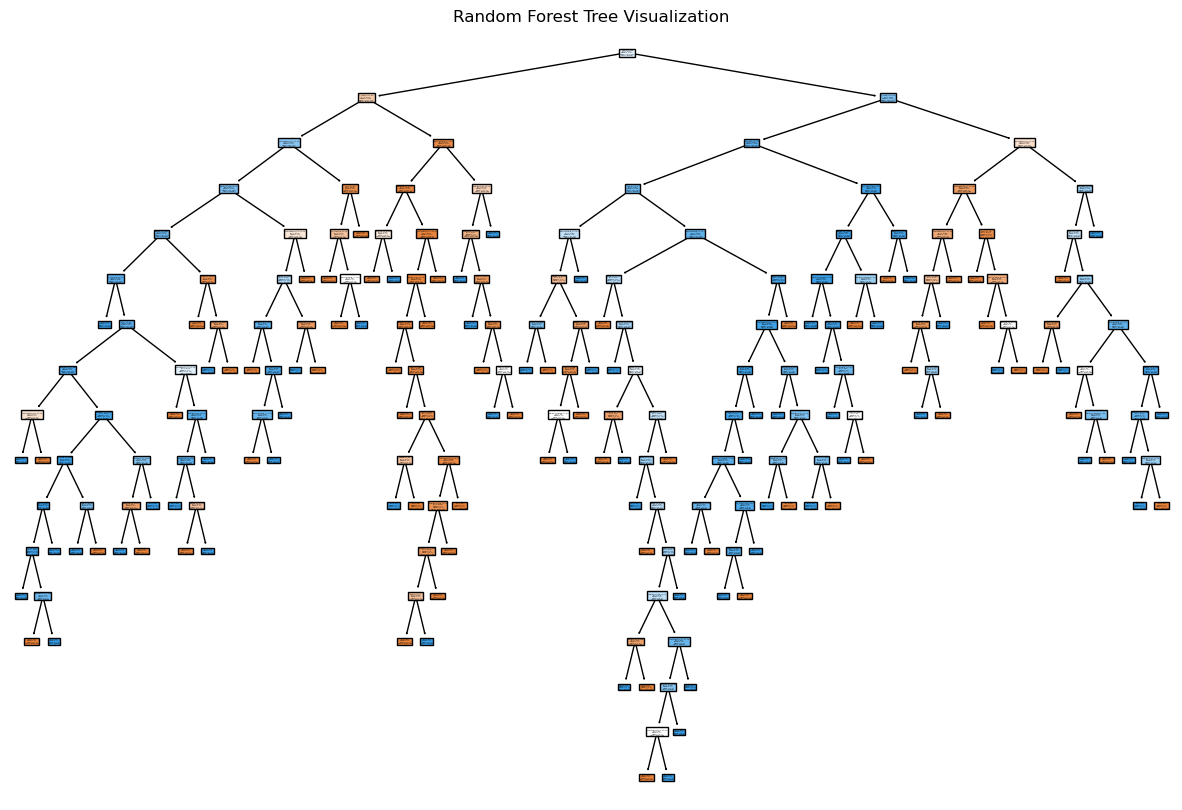

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

# Read the data
data = pd.read_csv('heart.csv')

# Define categorical and numerical features
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Summary
feature_importances = model.named_steps['classifier'].feature_importances_
feature_names_categorical = model.named_steps['preprocessor'].named_transformers_['cat']\
                                .named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine numerical and categorical feature names
feature_names = numerical_cols + list(feature_names_categorical)


# Create a DataFrame to show feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance for better visualization
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:\n", importance_df)

# Visualize the Random Forest
estimator = model.named_steps['classifier'].estimators_[0]  # Select one tree for visualization
plt.figure(figsize=(15, 10))
plot_tree(estimator, filled=True, feature_names=feature_names, class_names=["No Disease", "Disease"])
plt.title("Random Forest Tree Visualization")
plt.show()


## Summary

The Random Forest classifier was trained and evaluated on a dataset related to heart disease. The model achieved a certain accuracy on the test set. Additionally, a summary was generated to visualize feature importances, providing insights into which features contribute most to the model's predictions.

Visualization:

The script includes a visualization of one tree from the Random Forest to illustrate how individual trees make decisions. This visualization can help in understanding the complexity of the model and the contribution of different features to the decision-making process.

Note: Depending on the dataset size and complexity, the Random Forest may consist of multiple trees. The visualization here shows only one tree for simplicity.

# Support Vector Machine (SVM) Classifier

In [161]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataframe
df = pd.read_csv('heart.csv')

# Split features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Define categorical and numerical features
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model - Support Vector Machine (SVM) Classifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', SVC(random_state=42))])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8641304347826086

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## Summary

Accuracy:
Accuracy: 86.41%
This metric represents the overall correctness of the model's predictions. In this case, the SVM achieved an accuracy of approximately 86.41%, meaning that it correctly classified the target variable for about 86.41% of the instances in the test set.
Precision, Recall, and F1-Score:
Precision (for class 0): 83%

Precision is the ratio of correctly predicted positive observations to the total predicted positives. In the context of class 0, 83% of instances predicted as class 0 were actually class 0.
Recall (for class 0): 84%

Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to the all observations in the actual class. In this case, 84% of actual class 0 instances were correctly identified by the model.
F1-Score (for class 0): 84%

The F1-Score is the weighted average of precision and recall. It provides a balance between precision and recall. The F1-Score for class 0 is 84%.
Precision (for class 1): 89%

For class 1, 89% of instances predicted as class 1 were actually class 1.
Recall (for class 1): 88%

The recall for class 1 is 88%, indicating that 88% of actual class 1 instances were correctly identified.
F1-Score (for class 1): 88%

The F1-Score for class 1 is 88%, providing a balanced measure of precision and recall.
Support:
Support (for class 0): 77

The support is the number of actual occurrences of the class in the specified dataset. In this case, there were 77 instances of class 0 in the test set.
Support (for class 1): 107

There were 107 instances of class 1 in the test set.
Macro Avg, Weighted Avg:
Macro Avg (average): 86%

The macro-average calculates the unweighted mean of precision, recall, and F1-Score across classes. In this case, the macro-average is 86%.
Weighted Avg (average): 86%

The weighted-average calculates the average of precision, recall, and F1-Score, with each class's score weighted by its support. In this case, the weighted-average is 86%.
Summary:
The SVM model demonstrates a good overall performance with a high accuracy of 86.41%. The precision, recall, and F1-Score metrics for both classes are also quite favorable, indicating a well-balanced predictive capability across the two classes. These results suggest that the SVM model is effective in distinguishing between the two classes in the given dataset. However, it's essential to consider the specific requirements of the application and further analyze any domain-specific implications of the model's performance.

# Conclusion

Comparing & summarising results of the models: Logistic Regression, Decision Tree, Random Forest, and SVM.

### Logistic Regression:
- **Accuracy: 0.88**
- **Precision: 0.88**
- **Recall: 0.92**
- **F1 Score: 0.90**

### Decision Tree:
- **Model Accuracy on Test Set: 0.85**

### Random Forest:
- **Accuracy: 0.90**
- **Precision (class 0): 0.84**
- **Recall (class 0): 0.94**
- **F1-Score (class 0): 0.88**
- **Precision (class 1): 0.95**
- **Recall (class 1): 0.87**
- **F1-Score (class 1): 0.91**

### Support Vector Machine (SVM):
- **Accuracy: 0.86**
- **Precision (class 0): 0.83**
- **Recall (class 0): 0.84**
- **F1-Score (class 0): 0.84**
- **Precision (class 1): 0.89**
- **Recall (class 1): 0.88**
- **F1-Score (class 1): 0.88**

### Summary:

- **Random Forest** achieved the highest overall accuracy (90%) and demonstrated good precision, recall, and F1-Score for both classes. It outperformed the other models across various metrics.

- **Logistic Regression** also performed well with an accuracy of 88% and balanced precision, recall, and F1-Score.

- **Decision Tree** showed slightly lower accuracy compared to Random Forest and Logistic Regression.

- **SVM** performed reasonably well but with a slightly lower accuracy compared to Random Forest and Logistic Regression.

In conclusion, the **Random Forest model** appears to be the most effective in this context based on the provided metrics. However, the choice of the best model depends on the specific requirements and characteristics of the application, and further analysis or tuning may be needed to make a final decision.

***